# Clasificación de Mensajes como Spam o No Spam
Este notebook muestra un ejemplo pequeño y comentado de cómo clasificar mensajes usando técnicas básicas de Machine Learning en Python, incluyendo visualización de la matriz de confusión.

In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # se usa para visualizar la matriz de confusión

In [2]:
# Creamos un pequeño dataset de ejemplo
data = {
    'mensaje': [
        'Gana dinero fácil desde casa',
        'Oferta exclusiva solo hoy',
        'Nos vemos mañana en clase',
        'Tu pedido ha sido enviado',
        'Haz clic para ganar un iPhone',
        'Reunión a las 3pm en la oficina'
    ],
    'etiqueta': ['spam', 'spam', 'ham', 'ham', 'spam', 'ham']
}
df = pd.DataFrame(data)
df

,mensaje,etiqueta
0,Gana dinero fácil desde casa,spam
1,Oferta exclusiva solo hoy,spam
2,Nos vemos mañana en clase,ham
3,Tu pedido ha sido enviado,ham
4,Haz clic para ganar un iPhone,spam
5,Reunión a las 3pm en la oficina,ham


In [3]:
# Convertimos los mensajes a vectores numéricos
vectorizador = CountVectorizer()
X = vectorizador.fit_transform(df['mensaje'])
y = df['etiqueta']

In [4]:
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Entrenamos el modelo Naive Bayes
modelo = MultinomialNB()
modelo.fit(X_train, y_train)

MultinomialNB()

In [6]:
# Hacemos predicciones
y_pred = modelo.predict(X_test)

# Evaluamos el modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision * 100:.2f}%")

Precisión del modelo: 50.00%


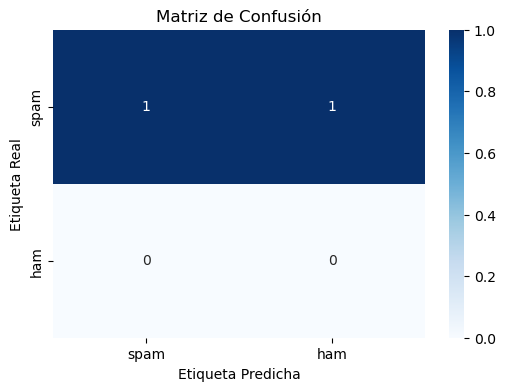

In [7]:
# Generamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=["spam", "ham"])

# Visualizamos la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["spam", "ham"], yticklabels=["spam", "ham"], cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()